## Importing And installing Required Modules

In [1]:
!pip install matplotlib openpyxl
!pip install xlrd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data set loading /Feeding.

In [4]:
import pandas as pd

# Load total population CSV
data = pd.read_csv("C:/Users/narmadha/.jupyter/API_SP.POP.TOTL_DS2_en_csv_v2_131993.csv", skiprows=3)
print(data.head(5))

# Load female population Excel file
female_data = pd.read_excel("C:/Users/narmadha/Downloads/API_SP.POP.TOTL.FE.IN_DS2_en_excel_v2_88529.xls", skiprows=3)
print(female_data.head(5))

# FIXED path for male population file
male_data = pd.read_excel("C:/Users/narmadha/Downloads/API_SP.POP.TOTL.MA.IN_DS2_en_excel_v2_88027 (1).xls", skiprows=3)
print(male_data.head(5))

age_0_14=pd.read_excel("C:/Users/narmadha/Downloads/API_SP.POP.0014.TO_DS2_en_excel_v2_92857.xls",skiprows=3)
age_15_64=pd.read_excel("C:/Users/narmadha/Downloads/API_SP.POP.1564.TO_DS2_en_excel_v2_92722.xls",skiprows=3)
age_65_above=pd.read_excel("C:/Users/narmadha/Downloads/API_SP.POP.65UP.TO_DS2_en_excel_v2_86993.xls",skiprows=3)
age_65_above.head(5)

                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130072080.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965  ...         2016         2017         2018         2019  \
0      58190.0  .

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"Population ages 65 and above, total",SP.POP.65UP.TO,1569.0,1595.0,1635.0,1681.0,1741.0,1815.0,...,12561.0,13225.0,13828.0,14497.0,15225.0,15828.0,16294.0,16848.0,17574.0,NaN
1,Africa Eastern and Southern,AFE,"Population ages 65 and above, total",SP.POP.65UP.TO,3883883.0,3963502.0,4048668.0,4140072.0,4240596.0,4350434.0,...,18341076.0,18981457.0,19680709.0,20483413.0,21340706.0,22167894.0,22937086.0,23755737.0,24665031.0,NaN
2,Afghanistan,AFG,"Population ages 65 and above, total",SP.POP.65UP.TO,255092.0,258856.0,262649.0,266530.0,270658.0,275154.0,...,797312.0,817372.0,842165.0,869752.0,899520.0,926221.0,941030.0,955689.0,985603.0,NaN
3,Africa Western and Central,AFW,"Population ages 65 and above, total",SP.POP.65UP.TO,3237415.0,3315440.0,3405172.0,3495447.0,3583081.0,3667456.0,...,12168631.0,12467968.0,12787106.0,13125837.0,13484789.0,13840833.0,14208296.0,14622147.0,15089656.0,NaN
4,Angola,AGO,"Population ages 65 and above, total",SP.POP.65UP.TO,165089.0,167610.0,169056.0,170141.0,170876.0,171267.0,...,757806.0,783570.0,811879.0,842844.0,876725.0,911747.0,947813.0,988280.0,1033205.0,NaN



## Data cleaning

In [9]:
# Filter to only relevant columns
Data_filtered = data[['Country Name', '2023']]

# Drop missing values
Data_filtered=Data_filtered.dropna()


# Rename for readability
Data_filtered.columns = ['Country', 'Population']

# Convert population to millions
#Data_filtered['Population (millions)'] = Data_filtered['Population'] / 1_000_000
Data_filtered.loc[:, 'Population (millions)'] = Data_filtered['Population'] / 1_000_000

# Sort by population
Data_sorted = Data_filtered.sort_values(by='Population (millions)', ascending=False)

# Display top 10 countries
Data_sorted.head(10)


,Country,Population,Population (millions)
259,World,8.061876e+09,8061.876001
103,IDA & IBRD total,6.858957e+09,6858.957145
140,Low & middle income,6.633110e+09,6633.109634
156,Middle income,5.896643e+09,5896.643239
102,IBRD only,4.952574e+09,4952.574126
62,Early-demographic dividend,3.511077e+09,3511.076811
139,Lower middle income,3.079779e+09,3079.778780
249,Upper middle income,2.816864e+09,2816.864459
63,East Asia & Pacific,2.384464e+09,2384.463611
142,Late-demographic dividend,2.326658e+09,2326.658047


## Create a bar chart for the top 15 most populated countries

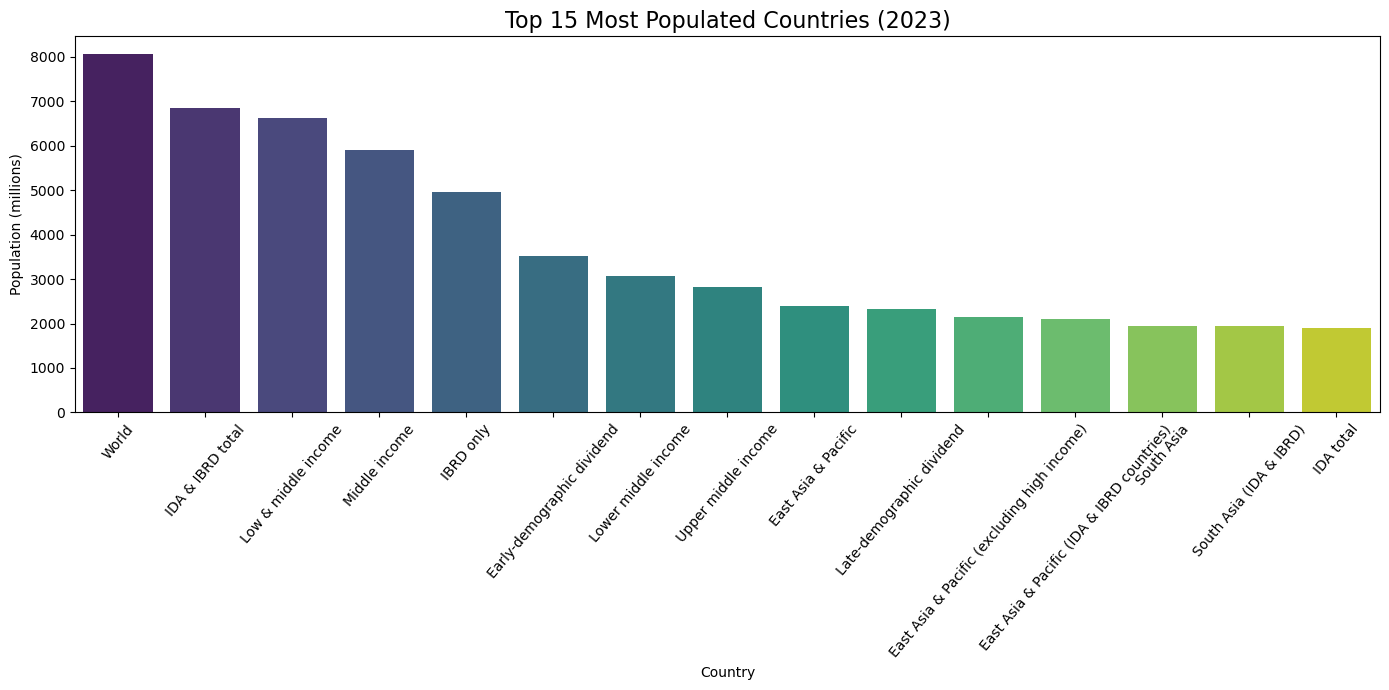

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.barplot(data=Data_sorted.head(15), x='Country', y='Population (millions)', hue='Country',palette='viridis',legend=False)

# Set chart title and labels
plt.title('Top 15 Most Populated Countries (2023)', fontsize=16)
plt.ylabel('Population (millions)')
plt.xlabel('Country')
plt.xticks(rotation=50)

# Show the plot
plt.tight_layout()
plt.show()

## gender wise data cleaning & Arranging

In [15]:
# Extract 2023 data and rename colum
print(female_data.columns)
print(male_data.columns)

female_data= female_data[['Country Name', '2023']]
female_data.dropna(inplace=True)
male_data = male_data[['Country Name', '2023']]
male_data.dropna(inplace=True)

female_data.columns = ['Country', 'Female']
male_data.columns = ['Country', 'Male']


Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987',

In [17]:
# Merge male and female datasets
gender = pd.merge(female_data, male_data, on='Country')

# Calculate total population and percentage female
gender['Total'] = gender['Female'] + gender['Male']
gender['% Female'] = (gender['Female'] / gender['Total']) * 100

# Sort by total population
gender_sorted = gender.sort_values(by='Total', ascending=False)


## Bar chart for gender distribution in top 10 most populated countries

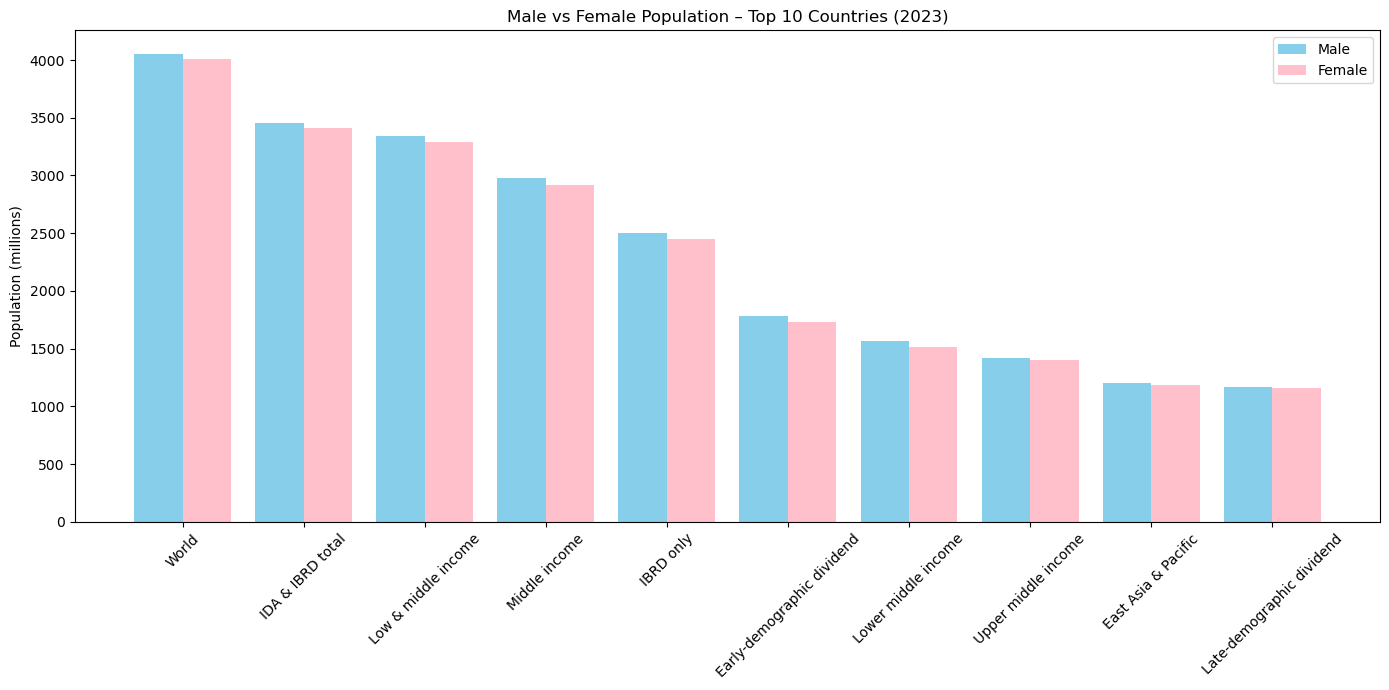

In [20]:
plt.figure(figsize=(14, 7))
top10 = gender_sorted.head(10)
bar_width = 0.4
positions = range(len(top10))

plt.bar(positions, top10['Male'] / 1_000_000, width=bar_width, label='Male', color='skyblue')
plt.bar([p + bar_width for p in positions], top10['Female'] / 1_000_000, width=bar_width, label='Female', color='pink')

plt.xticks([p + bar_width / 2 for p in positions], top10['Country'], rotation=45)
plt.ylabel('Population (millions)')
plt.title('Male vs Female Population – Top 10 Countries (2023)')
plt.legend()
plt.tight_layout()
plt.show()


## Age wise Population in the year 2023

In [22]:
print(age_0_14.columns)
print(age_15_64.columns)
print(age_65_above.columns)


Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987',

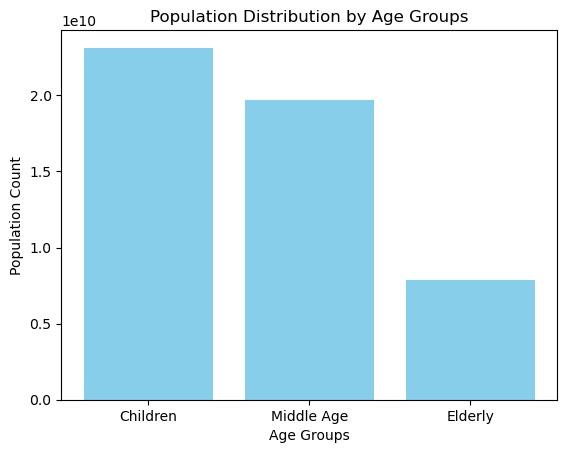

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Sum total populations across countries for each age group
total_children = age_0_14['2023'].dropna().astype(int).sum()
total_middle_age = age_15_64['2023'].dropna().astype(int).sum()
total_elderly = age_65_above['2023'].dropna().astype(int).sum()

# Data for plotting
categories = ['Children', 'Middle Age', 'Elderly']
populations = [total_children, total_middle_age, total_elderly]

# Plot bar chart
plt.bar(categories, populations, color='skyblue')
plt.xlabel('Age Groups')
plt.ylabel('Population Count')
plt.title('Population Distribution by Age Groups')
plt.show()